In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_preprocess_H2HBABBA3140.csv to train_preprocess_H2HBABBA3140 (1).csv


In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# to split and standarize the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate regression models
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['train_preprocess_H2HBABBA3140.csv']))

In [ ]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
1,CA02,0140104440,SO systems,2019-05-30 00:00:00,2019.0,2.960548e+09,2019-05-16,20190516,20190516,20190527.0,CAD,RV,1.0,NaN,105416.43,20190517.0,CA10,2.960548e+09,0
2,U001,CCU013,KRAFT F corporation,2019-03-01 00:00:00,2019.0,1.928622e+09,2019-01-18,20190114,20190118,20190118.0,USD,RV,1.0,NaN,3992.64,20190118.0,NAX2,1.928622e+09,0
3,U001,0200793568,SUPE llc,2019-09-19 00:00:00,2019.0,1.929823e+09,2019-09-02,20190902,20190902,20190917.0,USD,RV,1.0,NaN,87820.44,20190902.0,NAA8,1.929823e+09,0
4,U001,0200794332,COST foundation,2019-09-23 00:00:00,2019.0,1.929831e+09,2019-09-06,20190905,20190906,20190921.0,USD,RV,1.0,NaN,5685.93,20190906.0,NAAX,1.929831e+09,0


In [ ]:
df.shape

(50000, 19)

In [ ]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [ ]:
df.drop(columns='isOpen',axis=1,inplace=True)
df.drop(columns='area_business',axis=1,inplace=True)
df.drop(columns='invoice_id',axis=1,inplace=True)
df.drop(columns='document_create_date.1',axis=1,inplace=True)
df.drop(columns='posting_id',axis=1,inplace=True)
df.drop(columns='doc_id',axis=1,inplace=True)
df.drop(columns='document type',axis=1,inplace=True)

In [ ]:
df.drop(columns='document_create_date',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         50000 non-null  object 
 1   cust_number           50000 non-null  object 
 2   name_customer         50000 non-null  object 
 3   clear_date            40000 non-null  object 
 4   buisness_year         50000 non-null  float64
 5   posting_date          50000 non-null  object 
 6   due_in_date           50000 non-null  float64
 7   invoice_currency      50000 non-null  object 
 8   total_open_amount     50000 non-null  float64
 9   baseline_create_date  50000 non-null  float64
 10  cust_payment_terms    50000 non-null  object 
dtypes: float64(4), object(7)
memory usage: 4.2+ MB


In [ ]:
df['clear_date']= pd.to_datetime(df['clear_date'],format='%Y %m %d')

In [ ]:
df['due_in_date']= pd.to_datetime(df['due_in_date'],format='%Y%m%d')

In [ ]:
df['posting_date']= pd.to_datetime(df['posting_date'],format='%Y %m %d')

In [ ]:
df['delay'] = df['clear_date'] - df['due_in_date']

In [ ]:

df["delay"] = (df["delay"]).dt.days

In [ ]:
df["delay"]

0        -3.0
1         3.0
2        42.0
3         2.0
4         2.0
         ... 
49995     8.0
49996     6.0
49997     6.0
49998     1.0
49999     NaN
Name: delay, Length: 50000, dtype: float64

##REMOVING NULL VALUES

In [ ]:
df.isnull().sum()

business_code               0
cust_number                 0
name_customer               0
clear_date              10000
buisness_year               0
posting_date                0
due_in_date                 0
invoice_currency            0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
delay                   10000
dtype: int64

In [ ]:
df.drop(columns='clear_date',axis=1,inplace=True)

In [ ]:
df['business_code'] = np.where(df['business_code'].isin(['U005','U007']),'Other Code',df['business_code'])
df.business_code.value_counts()

U001          45332
CA02           3913
U013            573
U002            167
Other Code       15
Name: business_code, dtype: int64

In [ ]:
df.isnull().sum()

business_code               0
cust_number                 0
name_customer               0
buisness_year               0
posting_date                0
due_in_date                 0
invoice_currency            0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
delay                   10000
dtype: int64

In [ ]:
df.isnull().values.any()

True

##DATA PREPROCESSING

In [ ]:
main_train = df[df.delay.isnull()==False]
main_test = df[df.delay.isnull()]

In [ ]:
main_train.shape,main_test.shape

((40000, 11), (10000, 11))

In [ ]:
main_train.isna().sum()

business_code           0
cust_number             0
name_customer           0
buisness_year           0
posting_date            0
due_in_date             0
invoice_currency        0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
delay                   0
dtype: int64

In [ ]:
main_train.isnull().sum()

business_code           0
cust_number             0
name_customer           0
buisness_year           0
posting_date            0
due_in_date             0
invoice_currency        0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
delay                   0
dtype: int64

In [ ]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         40000 non-null  object        
 1   cust_number           40000 non-null  object        
 2   name_customer         40000 non-null  object        
 3   buisness_year         40000 non-null  float64       
 4   posting_date          40000 non-null  datetime64[ns]
 5   due_in_date           40000 non-null  datetime64[ns]
 6   invoice_currency      40000 non-null  object        
 7   total_open_amount     40000 non-null  float64       
 8   baseline_create_date  40000 non-null  float64       
 9   cust_payment_terms    40000 non-null  object        
 10  delay                 40000 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(5)
memory usage: 3.7+ MB


In [ ]:
main_train.nunique()

business_code               5
cust_number              1314
name_customer            3867
buisness_year               2
posting_date              423
due_in_date               497
invoice_currency            2
total_open_amount       35591
baseline_create_date      430
cust_payment_terms         70
delay                     186
dtype: int64

In [ ]:
main_train['posting_date'].min,main_train['posting_date'].max

(<bound method Series.min of 0       2019-11-13
 1       2019-05-16
 2       2019-01-18
 3       2019-09-02
 4       2019-09-06
            ...    
 49994   2019-08-20
 49995   2019-01-31
 49996   2019-05-21
 49997   2019-10-17
 49998   2019-06-04
 Name: posting_date, Length: 40000, dtype: datetime64[ns]>,
 <bound method Series.max of 0       2019-11-13
 1       2019-05-16
 2       2019-01-18
 3       2019-09-02
 4       2019-09-06
            ...    
 49994   2019-08-20
 49995   2019-01-31
 49996   2019-05-21
 49997   2019-10-17
 49998   2019-06-04
 Name: posting_date, Length: 40000, dtype: datetime64[ns]>)

In [ ]:
main_train.invoice_currency.value_counts()

USD    36821
CAD     3179
Name: invoice_currency, dtype: int64

In [ ]:
main_train.cov()

,buisness_year,total_open_amount,baseline_create_date,delay
buisness_year,0.113399,-1.813447e+02,1.041408e+03,-0.028996
total_open_amount,-181.344690,1.596826e+09,-1.486561e+06,602.498417
baseline_create_date,1041.407908,-1.486561e+06,1.037870e+07,-452.894396
delay,-0.028996,6.024984e+02,-4.528944e+02,121.651122


In [ ]:
main_train.corr()

,buisness_year,total_open_amount,baseline_create_date,delay
buisness_year,1.000000,-0.013476,0.959943,-0.007807
total_open_amount,-0.013476,1.000000,-0.011547,0.001367
baseline_create_date,0.959943,-0.011547,1.000000,-0.012746
delay,-0.007807,0.001367,-0.012746,1.000000


In [ ]:
# For catagorical columns with relatively low unique value (<= 12) -- looking for value_counts
# if unique count ==1 , constant column 
for col in main_train.columns:
    if main_train[col].nunique()<= 12:
        print(main_train[col].value_counts())
        print('#########################')

U001          36157
CA02           3179
U013            507
U002            143
Other Code       14
Name: business_code, dtype: int64
#########################
2019.0    34784
2020.0     5216
Name: buisness_year, dtype: int64
#########################
USD    36821
CAD     3179
Name: invoice_currency, dtype: int64
#########################


##SPLIT VALUE

In [ ]:
# X --> contains the dataframe without the target i.e price
X = main_train.drop('delay',axis=1)

# y --> contains only the target value 
y = main_train['delay']

In [ ]:
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [ ]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [ ]:
X_val.isnull().sum()

business_code           0
cust_number             0
name_customer           0
buisness_year           0
posting_date            0
due_in_date             0
invoice_currency        0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
dtype: int64

In [ ]:
X_train.shape , X_val.shape , X_test.shape

((28000, 10), (6000, 10), (6000, 10))

##EDA

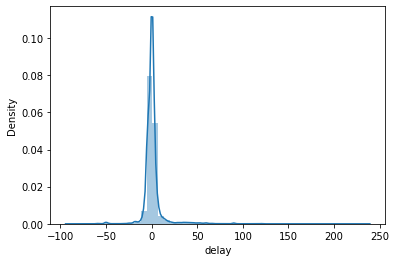

In [ ]:
sns.distplot(y_train)

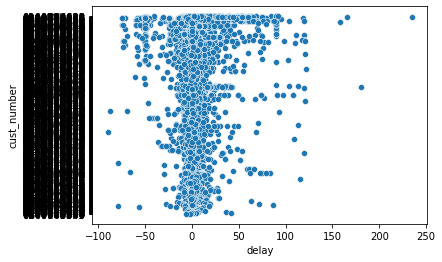

In [ ]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="cust_number")

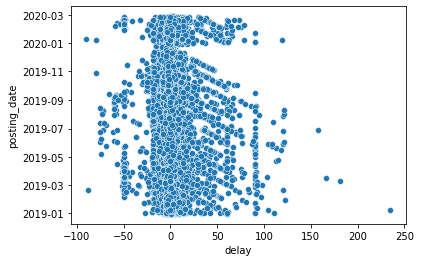

In [ ]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="posting_date") 

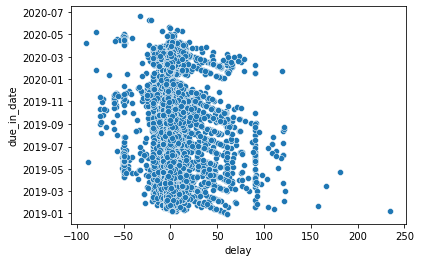

In [ ]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="due_in_date") 

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 34958
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         28000 non-null  object        
 1   cust_number           28000 non-null  object        
 2   name_customer         28000 non-null  object        
 3   buisness_year         28000 non-null  float64       
 4   posting_date          28000 non-null  datetime64[ns]
 5   due_in_date           28000 non-null  datetime64[ns]
 6   invoice_currency      28000 non-null  object        
 7   total_open_amount     28000 non-null  float64       
 8   baseline_create_date  28000 non-null  float64       
 9   cust_payment_terms    28000 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 2.3+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])

In [ ]:
X_train[['business_code_enc','business_code']]

,business_code_enc,business_code
0,2,U001
1,0,CA02
2,2,U001
3,2,U001
4,2,U001
...,...,...
34953,2,U001
34954,2,U001
34955,2,U001
34957,2,U001


In [ ]:
X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])

In [ ]:
X_val[['business_code_enc','business_code']]

,business_code_enc,business_code
34959,2,U001
34960,2,U001
34961,2,U001
34962,0,CA02
34964,2,U001
...,...,...
42458,2,U001
42460,2,U001
42462,2,U001
42463,2,U001


In [ ]:
def thanos_snap(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [ ]:
X_train ,X_val, X_test = thanos_snap(['business_code'])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 34958
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           28000 non-null  object        
 1   name_customer         28000 non-null  object        
 2   buisness_year         28000 non-null  float64       
 3   posting_date          28000 non-null  datetime64[ns]
 4   due_in_date           28000 non-null  datetime64[ns]
 5   invoice_currency      28000 non-null  object        
 6   total_open_amount     28000 non-null  float64       
 7   baseline_create_date  28000 non-null  float64       
 8   cust_payment_terms    28000 non-null  object        
 9   business_code_enc     28000 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 2.3+ MB


In [ ]:
X_train.nunique()

cust_number              1190
name_customer            3346
buisness_year               2
posting_date              423
due_in_date               491
invoice_currency            2
total_open_amount       25386
baseline_create_date      426
cust_payment_terms         67
business_code_enc           5
dtype: int64

In [ ]:
X_train

,cust_number,name_customer,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,business_code_enc
0,0200769623,WAL-MAR foundation,2019.0,2019-11-13,2019-11-28,USD,33133.29,20191113.0,NAH4,2
1,0140104440,SO systems,2019.0,2019-05-16,2019-05-27,CAD,105416.43,20190517.0,CA10,0
2,CCU013,KRAFT F corporation,2019.0,2019-01-18,2019-01-18,USD,3992.64,20190118.0,NAX2,2
3,0200793568,SUPE llc,2019.0,2019-09-02,2019-09-17,USD,87820.44,20190902.0,NAA8,2
4,0200794332,COST foundation,2019.0,2019-09-06,2019-09-21,USD,5685.93,20190906.0,NAAX,2
...,...,...,...,...,...,...,...,...,...,...
34953,0200875006,KROGER llc,2019.0,2019-02-23,2019-03-10,USD,101230.38,20190223.0,NAA8,2
34954,0200744019,TARG associates,2020.0,2020-01-25,2020-02-09,USD,11266.82,20200125.0,NAA8,2
34955,0200739006,AL co,2019.0,2019-10-15,2019-10-30,USD,10628.12,20191015.0,NAA8,2
34957,0200705742,DOT co,2019.0,2019-08-26,2019-09-10,USD,2834.64,20190826.0,NAA8,2


In [ ]:
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_train['cust_number'])
X_train['cust_number_enc'] = cust_number_encoder.transform(X_train['cust_number'])

In [ ]:
diff = set(X_val['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)

In [ ]:
X_val['cust_number_enc'] = cust_number_encoder.transform(X_val['cust_number'])

In [ ]:
diff2 = set(X_test['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)

In [ ]:
X_test['cust_number_enc'] = cust_number_encoder.transform(X_val['cust_number'])

In [ ]:
X_train[['cust_number_enc','cust_number']]

,cust_number_enc,cust_number
0,753,0200769623
1,331,0140104440
2,1189,CCU013
3,816,0200793568
4,819,0200794332
...,...,...
34953,853,0200875006
34954,701,0200744019
34955,683,0200739006
34957,623,0200705742


In [ ]:
X_train ,X_val, X_test = thanos_snap(['cust_number'])

In [ ]:
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc'] = name_customer_encoder.transform(X_train['name_customer'])

In [ ]:
diff = set(X_val['name_customer'])-set(name_customer_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_,items)
X_val['name_customer_enc'] = name_customer_encoder.transform(X_val['name_customer'])

In [ ]:
diff = set(X_test['name_customer'])-set(name_customer_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_,items)
X_test['name_customer_enc'] = name_customer_encoder.transform(X_val['name_customer'])

In [ ]:
X_train ,X_val, X_test = thanos_snap(['name_customer'])

In [ ]:
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(X_train['invoice_currency'])
X_train['invoice_currency_enc'] = invoice_currency_encoder.transform(X_train['invoice_currency'])
X_val['invoice_currency_enc'] = invoice_currency_encoder.transform(X_val['invoice_currency'])
X_test['invoice_currency_enc'] = invoice_currency_encoder.transform(X_test['invoice_currency'])

In [ ]:
X_train ,X_val, X_test = thanos_snap(['invoice_currency'])

In [ ]:
cust_payment_terms_encoder = LabelEncoder()

cust_payment_terms_encoder.fit(X_train['cust_payment_terms'])

X_train['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_train['cust_payment_terms'])

In [ ]:
diff = set(X_val['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)

In [ ]:
X_val['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_val['cust_payment_terms'])

In [ ]:

diff2 = set(X_test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)
for items in diff2:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)

In [ ]:
X_test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_test['cust_payment_terms'])

In [ ]:
X_train ,X_val, X_test = thanos_snap(['cust_payment_terms'])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 34958
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   buisness_year           28000 non-null  float64       
 1   posting_date            28000 non-null  datetime64[ns]
 2   due_in_date             28000 non-null  datetime64[ns]
 3   total_open_amount       28000 non-null  float64       
 4   baseline_create_date    28000 non-null  float64       
 5   business_code_enc       28000 non-null  int64         
 6   cust_number_enc         28000 non-null  int64         
 7   name_customer_enc       28000 non-null  int64         
 8   invoice_currency_enc    28000 non-null  int64         
 9   cust_payment_terms_enc  28000 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(5)
memory usage: 2.3 MB


In [ ]:
X_train['month'] = X_train['posting_date'].dt.month
X_val['month'] = X_val['posting_date'].dt.month
X_test['month'] = X_test['posting_date'].dt.month

In [ ]:
X_train['days'] = X_train['posting_date'].dt.day
X_val['days'] = X_val['posting_date'].dt.day
X_test['days'] = X_test['posting_date'].dt.day

In [ ]:
X_train ,X_val, X_test = thanos_snap(['posting_date'])

In [ ]:
X_train.nunique()

buisness_year                 2
due_in_date                 491
total_open_amount         25386
baseline_create_date        426
business_code_enc             5
cust_number_enc            1190
name_customer_enc          3346
invoice_currency_enc          2
cust_payment_terms_enc       67
month                        12
days                         31
dtype: int64

In [ ]:
buisness_year_encoder = LabelEncoder()
buisness_year_encoder.fit(X_train['buisness_year'])
X_train['buisness_year_enc'] = buisness_year_encoder.transform(X_train['buisness_year'])
X_val['buisness_year_enc'] = buisness_year_encoder.transform(X_val['buisness_year'])
X_test['buisness_year_enc'] = buisness_year_encoder.transform(X_test['buisness_year'])

In [ ]:
X_train ,X_val, X_test = thanos_snap(['buisness_year'])

In [ ]:
X_train['month_due'] = X_train['due_in_date'].dt.month
X_val['month_due'] = X_val['due_in_date'].dt.month
X_test['month_due'] = X_test['due_in_date'].dt.month

In [ ]:
X_train['days_due'] = X_train['due_in_date'].dt.day
X_val['days_due'] = X_val['due_in_date'].dt.day
X_test['days_due'] = X_test['due_in_date'].dt.day

In [ ]:
X_train ,X_val, X_test = thanos_snap(['due_in_date'])

In [ ]:
baseline_create_date_encoder = LabelEncoder()
baseline_create_date_encoder.fit(X_train['baseline_create_date'])
X_train['baseline_create_date_enc'] = baseline_create_date_encoder.transform(X_train['baseline_create_date'])

In [ ]:
diff = set(X_val['baseline_create_date'])-set(baseline_create_date_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    baseline_create_date_encoder.classes_ = np.append(baseline_create_date_encoder.classes_,items)

In [ ]:
X_val['baseline_create_date_enc'] = baseline_create_date_encoder.transform(X_val['baseline_create_date'])

In [ ]:
diff2 = set(X_test['baseline_create_date'])-set(baseline_create_date_encoder.classes_)
for items in diff2:
    baseline_create_date_encoder.classes_ = np.append(baseline_create_date_encoder.classes_,items)

In [ ]:
X_test['baseline_create_date_enc'] = baseline_create_date_encoder.transform(X_test['baseline_create_date'])

In [ ]:
X_train ,X_val, X_test = thanos_snap(['baseline_create_date'])

In [ ]:
X_train.isnull().sum()

total_open_amount           0
business_code_enc           0
cust_number_enc             0
name_customer_enc           0
invoice_currency_enc        0
cust_payment_terms_enc      0
month                       0
days                        0
buisness_year_enc           0
month_due                   0
days_due                    0
baseline_create_date_enc    0
dtype: int64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 0 to 34958
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_open_amount         28000 non-null  float64
 1   business_code_enc         28000 non-null  int64  
 2   cust_number_enc           28000 non-null  int64  
 3   name_customer_enc         28000 non-null  int64  
 4   invoice_currency_enc      28000 non-null  int64  
 5   cust_payment_terms_enc    28000 non-null  int64  
 6   month                     28000 non-null  int64  
 7   days                      28000 non-null  int64  
 8   buisness_year_enc         28000 non-null  int64  
 9   month_due                 28000 non-null  int64  
 10  days_due                  28000 non-null  int64  
 11  baseline_create_date_enc  28000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.8 MB


In [ ]:
X_train.nunique()

total_open_amount           25386
business_code_enc               5
cust_number_enc              1190
name_customer_enc            3346
invoice_currency_enc            2
cust_payment_terms_enc         67
month                          12
days                           31
buisness_year_enc               2
month_due                      12
days_due                       31
baseline_create_date_enc      426
dtype: int64

In [ ]:
total_open_amount_encoder = LabelEncoder()
total_open_amount_encoder.fit(X_train['total_open_amount'])
X_train['total_open_amount_enc'] = total_open_amount_encoder.transform(X_train['total_open_amount'])

In [ ]:
diff = set(X_val['total_open_amount'])-set(total_open_amount_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    total_open_amount_encoder.classes_ = np.append(total_open_amount_encoder.classes_,items)

In [ ]:
X_val['total_open_amount_enc'] = total_open_amount_encoder.transform(X_val['total_open_amount'])

In [ ]:
diff2 = set(X_test['total_open_amount'])-set(total_open_amount_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    total_open_amount_encoder.classes_ = np.append(total_open_amount_encoder.classes_,items)

In [ ]:
X_test['total_open_amount_enc'] = total_open_amount_encoder.transform(X_val['total_open_amount'])

In [ ]:
X_train ,X_val, X_test = thanos_snap(['total_open_amount'])

##Feature Selection

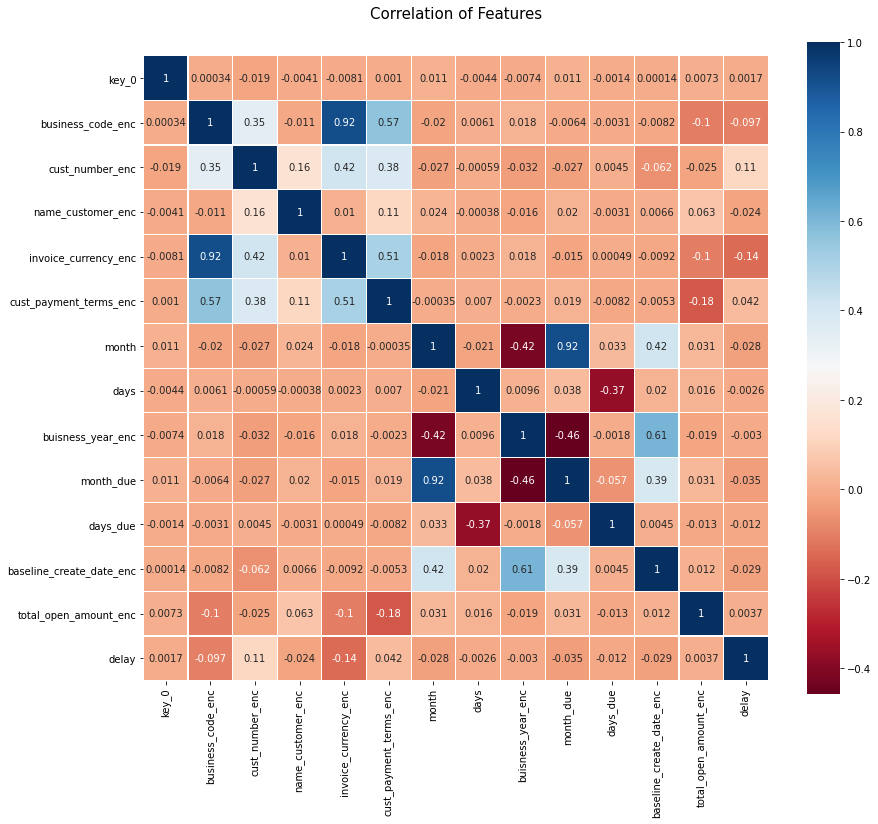

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train, on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

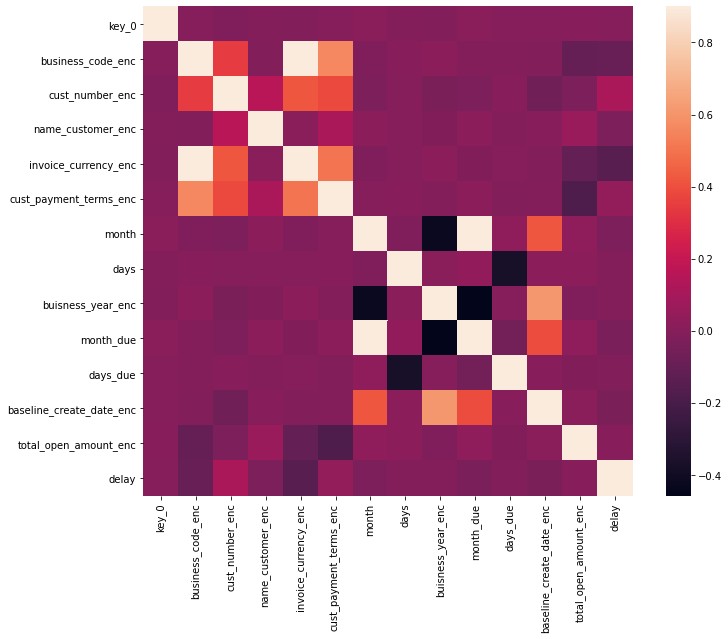

In [ ]:
corrmat = X_train.merge(y_train , on = X_train.index).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [ ]:
sel.variances_

array([3.62967142e-01, 4.91780962e+04, 1.24249683e+06, 7.41695395e-02,
       1.33802346e+02, 1.22505921e+01, 7.56987017e+01, 1.12862040e-01,
       1.21212269e+01, 7.67165965e+01, 1.40767391e+04, 5.45556060e+07])

In [ ]:
main_test.isna().sum()

business_code               0
cust_number                 0
name_customer               0
buisness_year               0
posting_date                0
due_in_date                 0
invoice_currency            0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
delay                   10000
dtype: int64

In [ ]:
X_main_test = main_test.drop(['delay'],axis=1)
X_main_test

# ALSO LETS DROP Delay FROM MAIN TEST ITSELF
main_test.drop(['delay'], inplace =True,axis=1)

In [ ]:
X_main_test

,business_code,cust_number,name_customer,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
6,U001,0200148860,DOLLA co,2020.0,2020-04-10,2020-06-14,USD,8506.12,20200410.0,NAGD
12,U001,200418007,AM foundation,2020.0,2020-03-28,2020-04-12,USD,8252.36,20200328.0,NAA8
23,U001,0200769623,WAL-MAR systems,2020.0,2020-04-24,2020-05-09,USD,38575.02,20200424.0,NAH4
24,U001,0200726979,BJ'S,2020.0,2020-04-23,2020-05-08,USD,1037.59,20200423.0,NAA8
27,U001,200936373,SUPE us,2020.0,2020-05-01,2020-05-16,USD,153237.08,20200501.0,NAA8
...,...,...,...,...,...,...,...,...,...,...
49976,U001,0200769623,WAL-MAR in,2020.0,2020-04-25,2020-05-10,USD,5932.07,20200425.0,NAH4
49978,U001,0200769623,WAL-MAR foundation,2020.0,2020-03-04,2020-03-19,USD,48856.58,20200304.0,NAH4
49986,CA02,0140104409,LOB co,2020.0,2020-04-14,2020-04-26,CAD,45816.32,20200416.0,CA10
49992,U001,0200772595,SAFEW trust,2020.0,2020-03-27,2020-04-11,USD,154963.96,20200327.0,NAA8


In [ ]:
X_main_test['business_code_enc'] = business_code_encoder.transform(X_main_test['business_code'])

In [ ]:
temp = set(X_main_test['cust_number'])-set(cust_number_encoder.classes_)
for items in temp:
    cust_number_encoder.classes_= np.append(cust_number_encoder.classes_,items)

X_main_test['cust_number_enc'] = cust_number_encoder.transform(X_main_test['cust_number'])

In [ ]:
temp2 = set(X_main_test['name_customer'])-set(name_customer_encoder.classes_)
for items in temp2:
    name_customer_encoder.classes_= np.append(name_customer_encoder.classes_,items)
    
X_main_test['name_customer_enc'] = name_customer_encoder.transform(X_main_test['name_customer'])

In [ ]:
X_main_test['month'] = X_main_test['posting_date'].dt.month
X_main_test['days'] = X_main_test['posting_date'].dt.day

In [ ]:
X_main_test['buisness_year_enc'] = buisness_year_encoder.transform(X_main_test['buisness_year'])

In [ ]:

X_main_test['month_due'] = X_main_test['due_in_date'].dt.month
X_main_test['days_due'] = X_main_test['due_in_date'].dt.day

In [ ]:
X_main_test['invoice_currency_enc'] = invoice_currency_encoder.transform(X_main_test['invoice_currency'])

In [ ]:
temp3 = set(X_main_test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)
for items in temp3:
    cust_payment_terms_encoder.classes_= np.append(cust_payment_terms_encoder.classes_,items)
    
X_main_test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_main_test['cust_payment_terms'])

In [ ]:
temp4 = set(X_main_test['baseline_create_date'])-set(baseline_create_date_encoder.classes_)
for items in temp4:
    baseline_create_date_encoder.classes_= np.append(baseline_create_date_encoder.classes_,items)
    
X_main_test['baseline_create_date_enc'] = baseline_create_date_encoder.transform(X_main_test['baseline_create_date'])

In [ ]:
temp5 = set(X_main_test['total_open_amount'])-set(total_open_amount_encoder.classes_)
for items in temp5:
    total_open_amount_encoder.classes_= np.append(total_open_amount_encoder.classes_,items)

X_main_test['total_open_amount_enc'] = total_open_amount_encoder.transform(X_main_test['total_open_amount'])

In [ ]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 6 to 49999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   business_code             10000 non-null  object        
 1   cust_number               10000 non-null  object        
 2   name_customer             10000 non-null  object        
 3   buisness_year             10000 non-null  float64       
 4   posting_date              10000 non-null  datetime64[ns]
 5   due_in_date               10000 non-null  datetime64[ns]
 6   invoice_currency          10000 non-null  object        
 7   total_open_amount         10000 non-null  float64       
 8   baseline_create_date      10000 non-null  float64       
 9   cust_payment_terms        10000 non-null  object        
 10  business_code_enc         10000 non-null  int64         
 11  cust_number_enc           10000 non-null  int64         
 12  name_customer_enc 

In [ ]:
X_main_test.drop(['business_code','cust_number','name_customer','buisness_year','posting_date','due_in_date','invoice_currency','total_open_amount','baseline_create_date','cust_payment_terms'],inplace =True ,axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = base_model.predict(X_val)

In [ ]:

from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

10.316376894987872

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5,max_leaf_nodes=5)

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=5,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_predict2 = regressor.predict(X_val)

In [ ]:
mean_squared_error(y_val, y_predict2, squared=False)

9.183634412410155

In [ ]:
final_result = regressor.predict(X_main_test)

In [ ]:
final_result = pd.Series(final_result,name='delay')

In [ ]:
main_test.reset_index(drop=True,inplace=True)

In [ ]:
Final = main_test.merge(final_result , on = X_main_test.index )
Final

,key_0,business_code,cust_number,name_customer,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,6,U001,0200148860,DOLLA co,2020.0,2020-04-10,2020-06-14,USD,8506.12,20200410.0,NAGD,1.876922
1,12,U001,200418007,AM foundation,2020.0,2020-03-28,2020-04-12,USD,8252.36,20200328.0,NAA8,1.876922
2,23,U001,0200769623,WAL-MAR systems,2020.0,2020-04-24,2020-05-09,USD,38575.02,20200424.0,NAH4,1.876922
3,24,U001,0200726979,BJ'S,2020.0,2020-04-23,2020-05-08,USD,1037.59,20200423.0,NAA8,1.876922
4,27,U001,200936373,SUPE us,2020.0,2020-05-01,2020-05-16,USD,153237.08,20200501.0,NAA8,1.876922
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49976,U001,0200769623,WAL-MAR in,2020.0,2020-04-25,2020-05-10,USD,5932.07,20200425.0,NAH4,1.876922
9996,49978,U001,0200769623,WAL-MAR foundation,2020.0,2020-03-04,2020-03-19,USD,48856.58,20200304.0,NAH4,1.876922
9997,49986,CA02,0140104409,LOB co,2020.0,2020-04-14,2020-04-26,CAD,45816.32,20200416.0,CA10,1.876922
9998,49992,U001,0200772595,SAFEW trust,2020.0,2020-03-27,2020-04-11,USD,154963.96,20200327.0,NAA8,1.876922


In [ ]:
regressor_accuracy=round(regressor.score(X_train,y_train)*100,2)
print(round(regressor_accuracy,2),'%')

30.58 %


#BUCKET LIST

In [ ]:
real_time_data =regressor.predict(X_test)
real_time_data[0:3]

array([-2.18218788, -2.18218788, -2.18218788])

In [ ]:
def Mapping(x):
    temp = []
    for i in list(x):
        if i < 0:
            temp.append("befor due")
        elif i==0:
            temp.append(" ON due ")
        else :
            temp.append(" after due ")
    return temp

col = Mapping(real_time_data)
bucket = pd.DataFrame()
bucket['Predictions'] = real_time_data
bucket['Bucket_list'] = col
bucket.head()

,Predictions,Bucket_list
0,-2.182188,befor due
1,-2.182188,befor due
2,-2.182188,befor due
3,-2.182188,befor due
4,1.876922,after due
